In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split 
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df = pd.read_excel(r'C:\Users\dell\OneDrive\Desktop\Excle_assignment\assignment_news\Random Forest-14\glass.xlsx',sheet_name="glass")
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


Exploratory Data Analysis (EDA):

In [3]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [4]:
df.isnull().sum() # Not any null values
missing_per = (df.isnull().sum()/len(df))*100
missing_per

RI      0.0
Na      0.0
Mg      0.0
Al      0.0
Si      0.0
K       0.0
Ca      0.0
Ba      0.0
Fe      0.0
Type    0.0
dtype: float64

In [5]:
df.dtypes  # All the feature is numeric

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [6]:
for i in df.columns:
    print(f'----------{i}--------------')
    print(df[i].unique())
    

----------RI--------------
[1.52101 1.51761 1.51618 1.51766 1.51742 1.51596 1.51743 1.51756 1.51918
 1.51755 1.51571 1.51763 1.51589 1.51748 1.51784 1.52196 1.51911 1.51735
 1.5175  1.51966 1.51736 1.51751 1.5172  1.51764 1.51793 1.51721 1.51768
 1.51747 1.51775 1.51753 1.51783 1.51567 1.51909 1.51797 1.52213 1.51779
 1.5221  1.51786 1.519   1.51869 1.52667 1.52223 1.51898 1.5232  1.51926
 1.51808 1.51837 1.51778 1.51769 1.51215 1.51824 1.51754 1.51905 1.51977
 1.52172 1.52227 1.52099 1.52152 1.523   1.51574 1.51848 1.51593 1.51631
 1.5159  1.51645 1.51627 1.51613 1.51592 1.51646 1.51594 1.51409 1.51625
 1.51569 1.5164  1.51841 1.51605 1.51588 1.51629 1.5186  1.51689 1.51811
 1.51655 1.5173  1.5182  1.52725 1.5241  1.52475 1.53125 1.53393 1.52222
 1.51818 1.52664 1.52739 1.52777 1.51892 1.51847 1.51846 1.51829 1.51708
 1.51673 1.51652 1.51844 1.51663 1.51687 1.51707 1.52177 1.51872 1.51667
 1.52081 1.52068 1.5202  1.52614 1.51813 1.518   1.51789 1.51806 1.51711
 1.51674 1.5169  1.51851

Detect Outliers

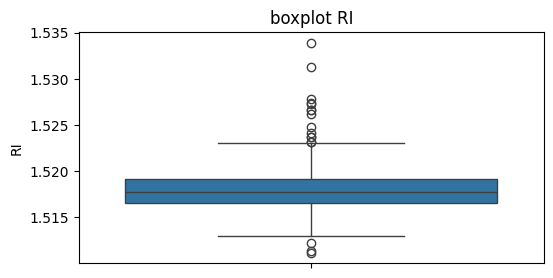

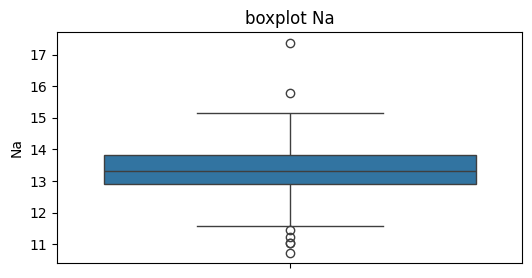

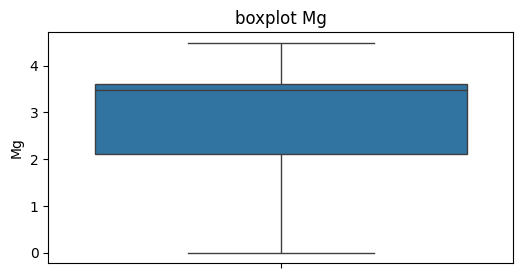

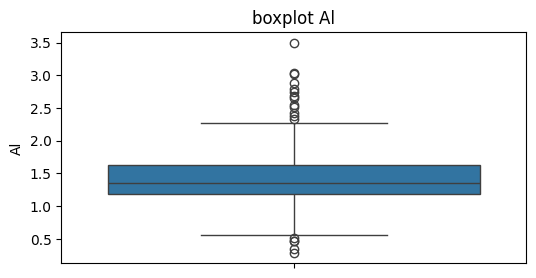

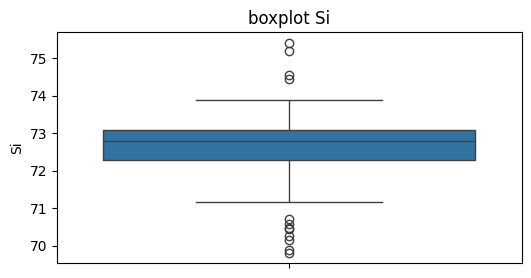

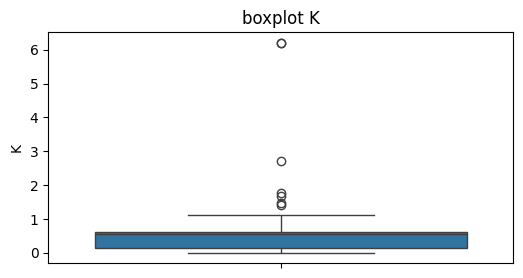

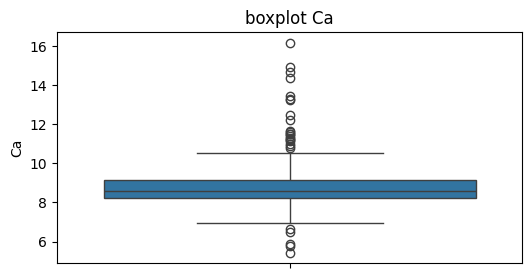

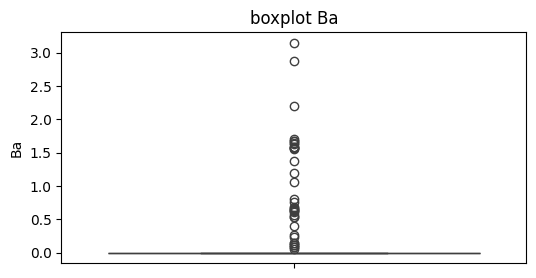

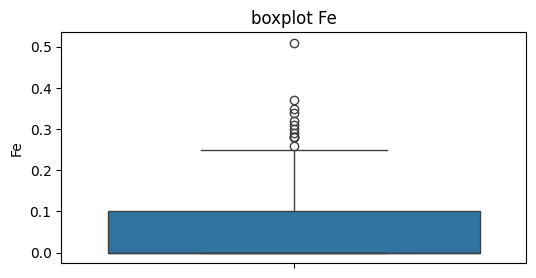

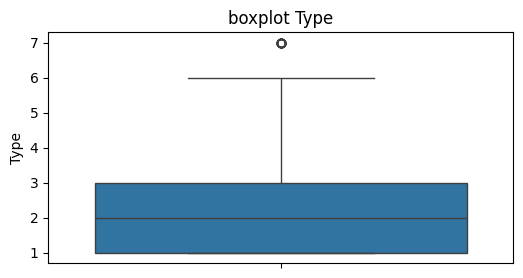

In [7]:
for i in df.columns:
    plt.figure(figsize=(6,3))
    sns.boxplot(df[i])
    plt.title(f'boxplot {i}')
    plt.show()

Check for Inconsistencies

In [8]:
print(df.duplicated().sum())  # having one duplicate value

df.drop_duplicates(inplace=True)

1


Visualize Distributions

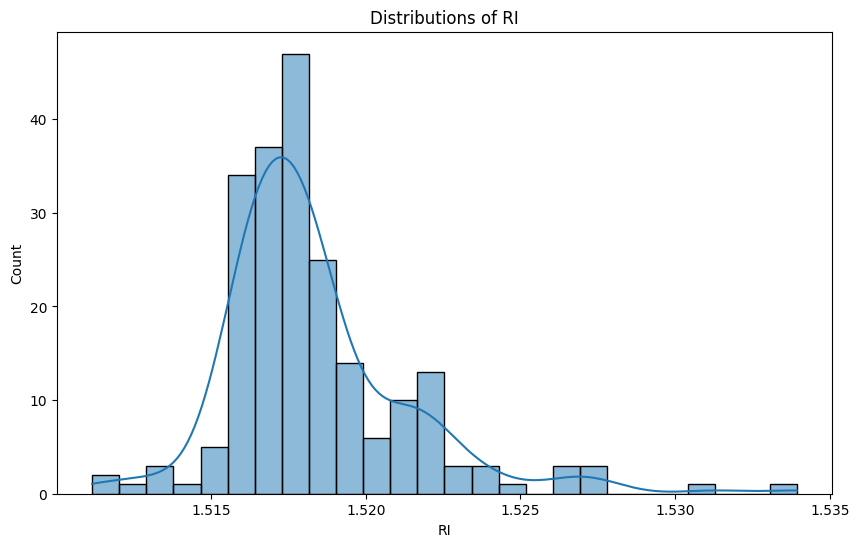

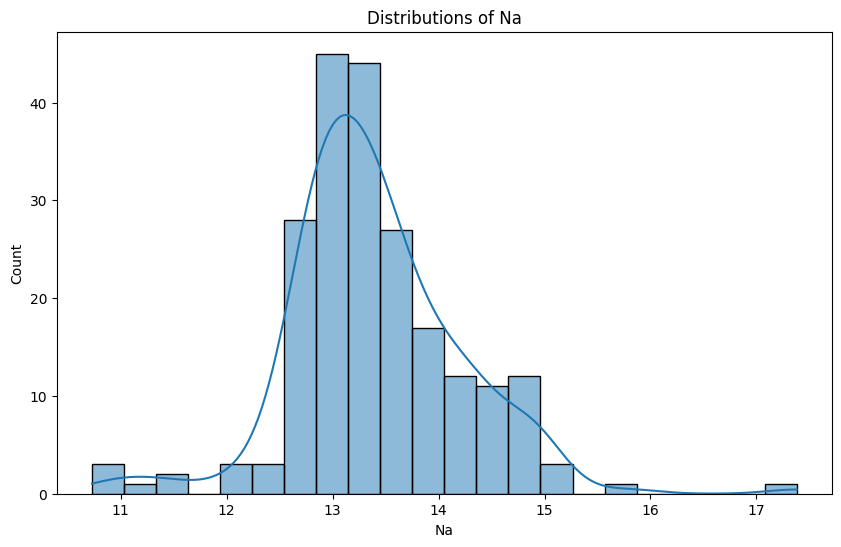

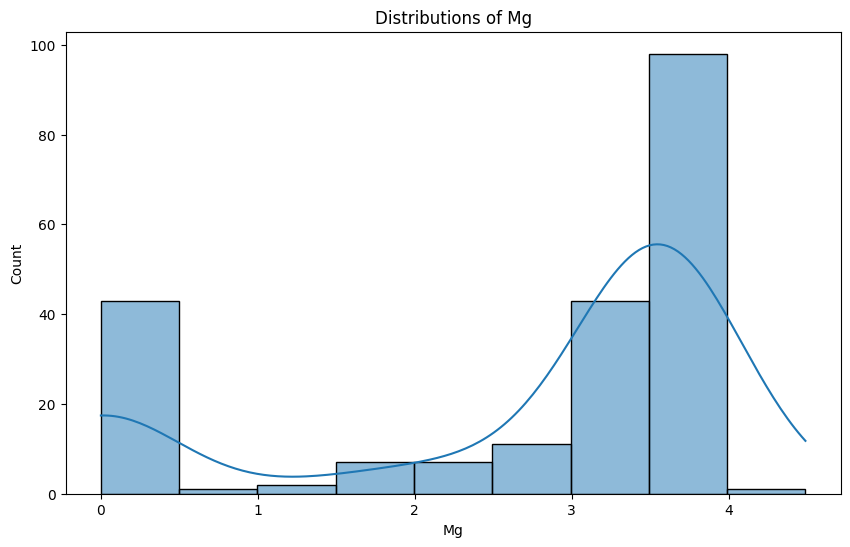

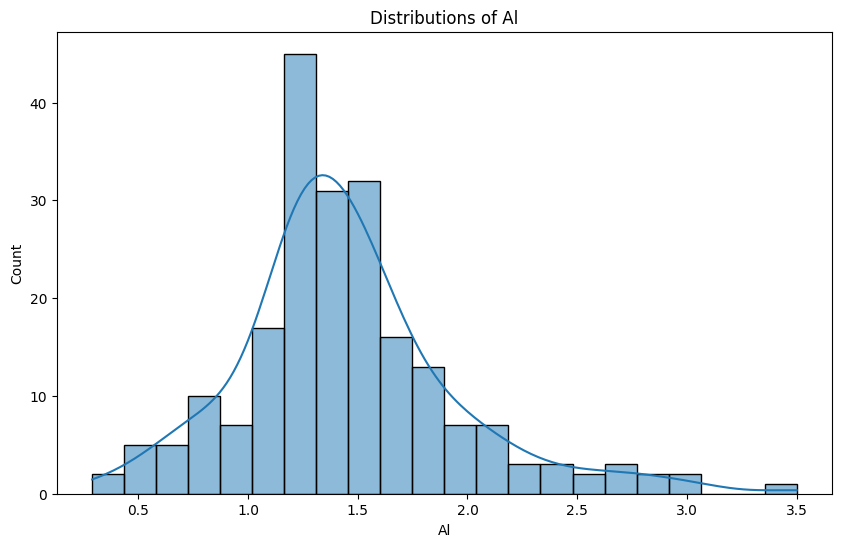

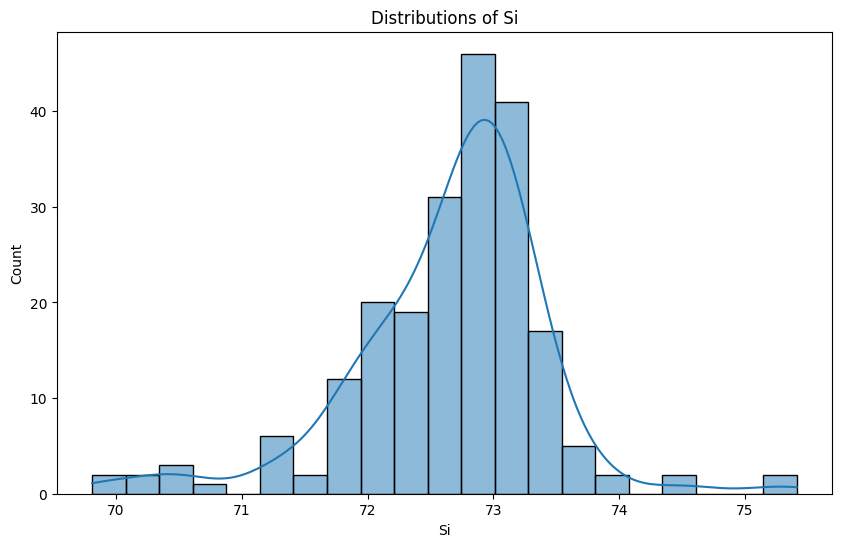

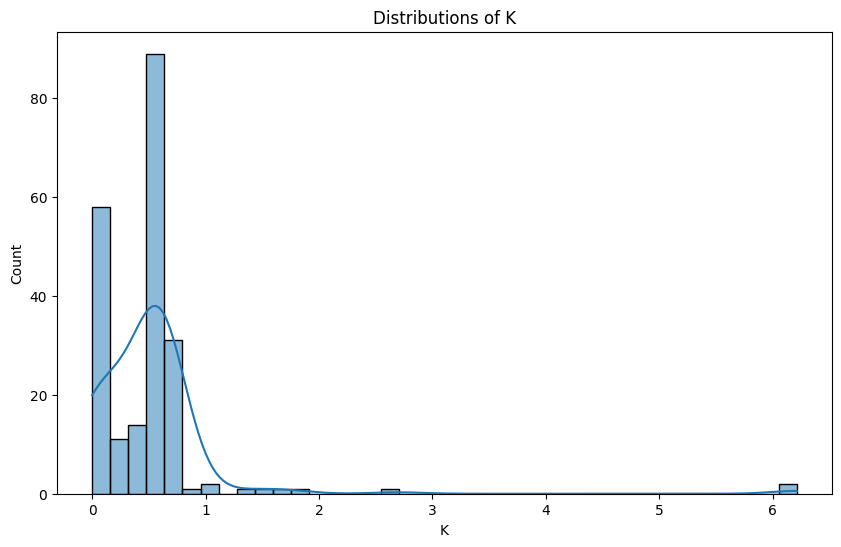

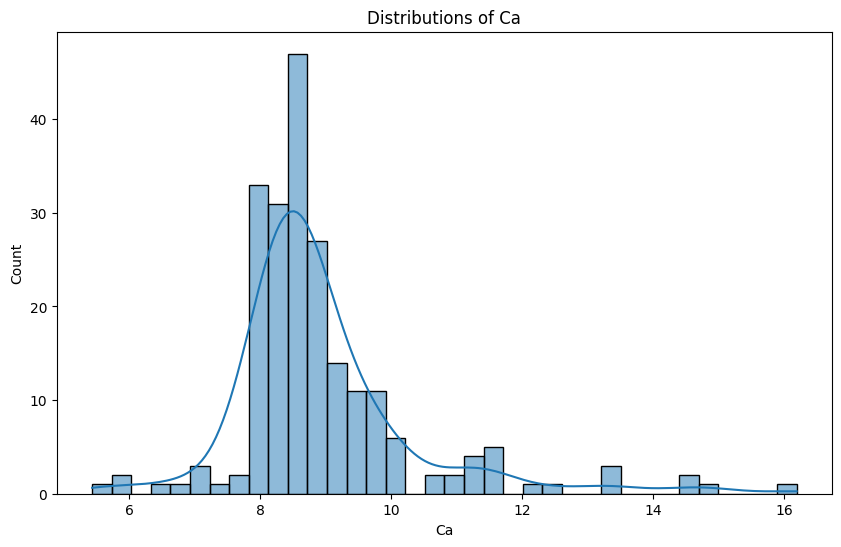

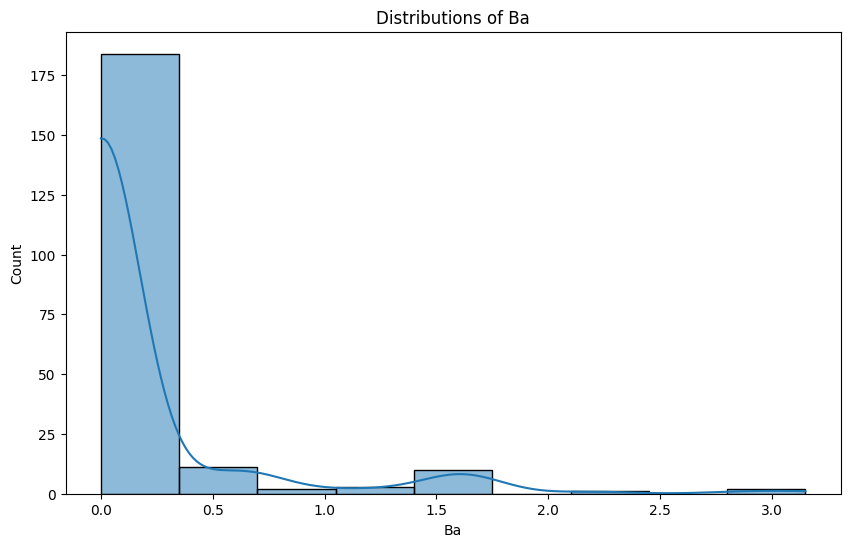

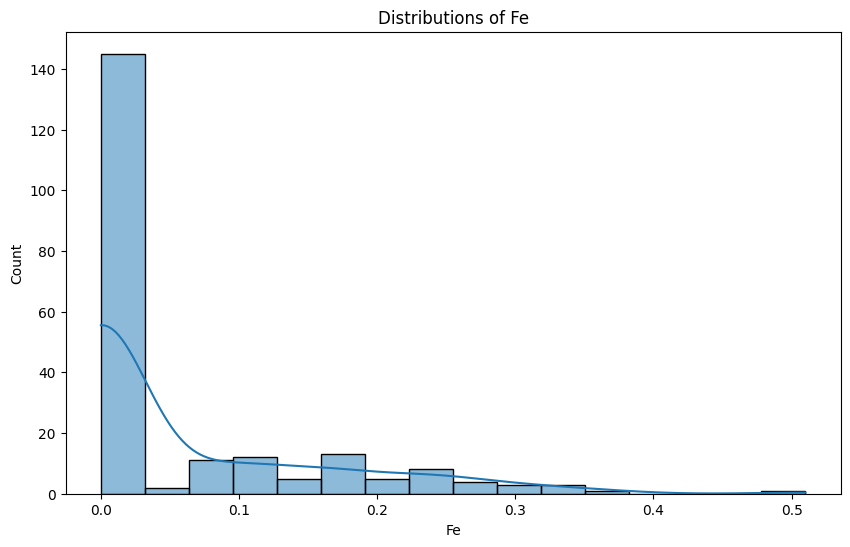

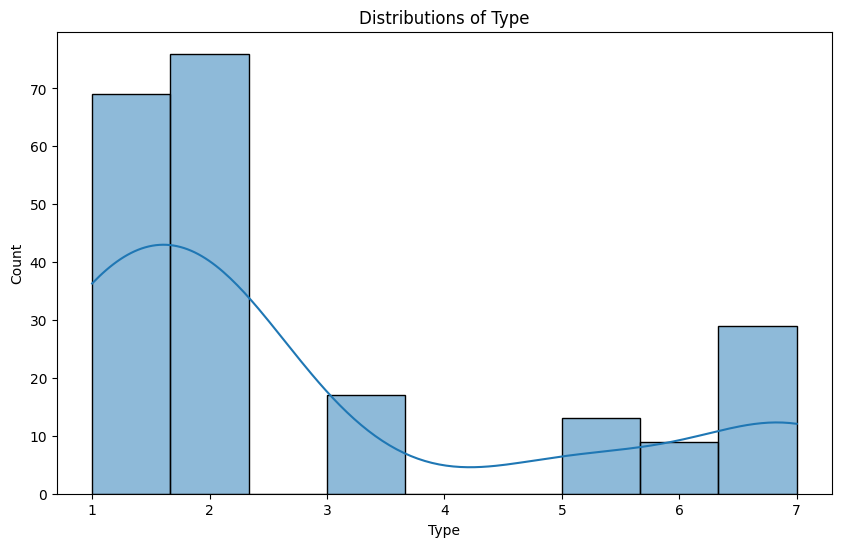

In [9]:
for col in df.columns:
    plt.figure(figsize=(10,6))
    sns.histplot(df[col],kde=True)
    plt.title(f"Distributions of {col}")
    plt.show()

Correlation Analysis

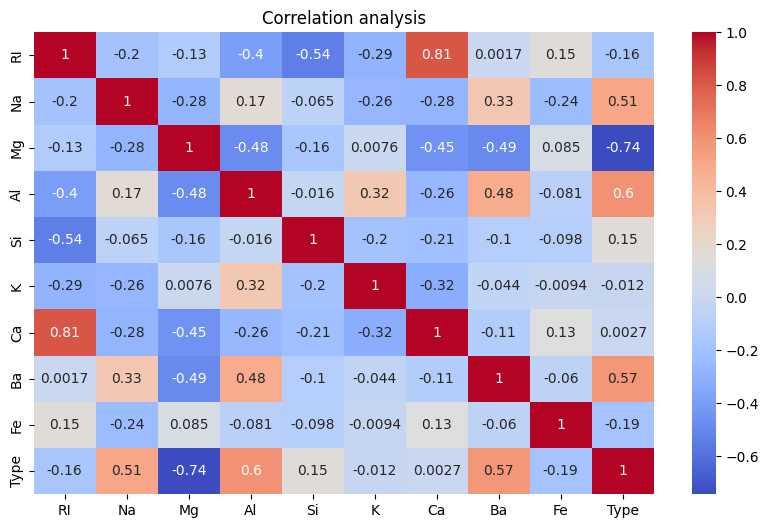

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation analysis')
plt.show()

| Feature Pair  | Correlation (approx) | Interpretation                                                                        |
| ------------- | -------------------- | ------------------------------------------------------------------------------------- |
| **RI – Ca**   | **+0.81**            | Strong positive correlation — as Calcium increases, Refractive Index also increases.  |
| **RI – Si**   | **-0.54**            | Moderate negative correlation — higher Silicon corresponds to lower Refractive Index. |
| **Na – Mg**   | **-0.28**            | Weak negative correlation.                                                            |
| **Mg – Type** | **-0.74**            | Strong negative correlation — Type is inversely related to Magnesium.                 |
| **Na – Type** | **+0.51**            | Moderate positive correlation — Type tends to increase with Sodium.                   |
| **Ba – Type** | **+0.57**            | Moderate positive correlation — Type tends to increase with Barium.                   |
| **Mg – Al**   | **-0.48**            | Moderate negative correlation.                                                        |
| **Al – Ba**   | **+0.48**            | Moderate positive correlation.                                                        |

| Feature | Correlation with `Type` | Relationship          | Interpretation                                                                                                    |
| ------- | ----------------------- | --------------------- | ----------------------------------------------------------------------------------------------------------------- |
| **Mg**  | **-0.74**               | Strong **negative**   | As Magnesium increases, `Type` decreases. This means Mg is likely an important factor distinguishing glass types. |
| **Ba**  | **+0.57**               | Moderate **positive** | Higher Barium values tend to correspond to higher `Type`.                                                         |
| **Na**  | **+0.51**               | Moderate **positive** | Sodium concentration increases with certain glass types.                                                          |
| **Al**  | **+0.15**               | Weak **positive**     | Slight increase in Type as Aluminium increases.                                                                   |
| **Fe**  | **-0.19**               | Weak **negative**     | Very small effect on Type.                                                                                        |
| **Ca**  | **+0.0027**             | No correlation        | Calcium doesn’t influence Type significantly.                                                                     |
| **K**   | **-0.012**              | No correlation        | Potassium has almost no effect.                                                                                   |
| **Si**  | **+0.15**               | Weak **positive**     | Minor relation with Type.                                                                                         |
| **RI**  | **-0.16**               | Weak **negative**     | Refractive Index slightly decreases for higher Type.                                                              |


Data Preprocessing

In [11]:
# Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy 
# (e.g., imputation or removal) and explain your reasoning.

df.isnull().sum()  # no any missing value 

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [12]:
df['Type'].value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [13]:
# Apply feature scaling techniques such as standardization or normalization to ensure that
#  all features are on a similar scale. Handling the imbalance data.

# Random Forest doesn’t require feature scaling because it’s tree-based and depends on feature order,
# not magnitude. Scaling matters for distance or gradient-based models like SVM, KNN, or logistic regression.


In [14]:
# train test split 
df_copy = df.copy()

x = df_copy.iloc[:,:9]
y = df_copy['Type']

x_train,x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

handling imbalance data

In [15]:
# by using SMOTE , handling imbalance data
print("before SMOTE") 
print(f'shape x_train : {x_train.shape}')
print(f"shape y_train: {y_train.shape}")
print(f"count values : {y_train.value_counts()}")
print('-------------------------------')
sm = SMOTE(random_state=42)

x_train , y_train =  sm.fit_resample(x_train,y_train)

print("after SMOTE") 
print(f'shape x_train : {x_train.shape}')
print(f"shape y_train : {y_train.shape}")
print(f"count values : {y_train.value_counts()}")



before SMOTE
shape x_train : (170, 9)
shape y_train: (170,)
count values : 2    61
1    59
7    20
3    14
5    10
6     6
Name: Type, dtype: int64
-------------------------------
after SMOTE
shape x_train : (366, 9)
shape y_train : (366,)
count values : 2    61
3    61
1    61
7    61
5    61
6    61
Name: Type, dtype: int64


Random Forest Model Implementation

In [25]:
# Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

y_predict=rf.predict(x_test)


#Accuracy_score

accuracy_scor = accuracy_score(y_test,y_predict)
print(f'accuracy_scor : {accuracy_scor}')

# Precision
prec = precision_score(y_test,y_predict,average=None)
print(f'precision_sc : {prec}')

# Recall
recall_pred = recall_score(y_test,y_predict,average=None)
print(f'recall score : {recall_pred}')

# F1-score
f1_pred = f1_score(y_test,y_predict,average=None)
print(f"f1_scor : {f1_pred}")



accuracy_scor : 0.7906976744186046
precision_sc : [0.72727273 0.84615385 0.5        0.6        1.         1.        ]
recall score : [0.8        0.73333333 0.66666667 1.         1.         0.77777778]
f1_scor : [0.76190476 0.78571429 0.57142857 0.75       1.         0.875     ]


In [17]:
'''# Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth,
#  minimum samples split, and criterion.

# using gridserchv for this process 

from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators":[50,60,70,80,90,100],
    "max_features": [0.2,0.3,0.4,0.5,0.6,0.7,None],
    "bootstrap":[True,False],
    "oob_score":[True,False],
    "n_jobs":[-1,None],
    "max_samples":[0.2,0.3,0.4,0.5,0.6,0.7,None]
    
}

grid = GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1)
grid.fit(x_train,y_train)'''

'# Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth,\n#  minimum samples split, and criterion.\n\n# using gridserchv for this process \n\nfrom sklearn.model_selection import GridSearchCV\n\nparam_grid = {\n    "n_estimators":[50,60,70,80,90,100],\n    "max_features": [0.2,0.3,0.4,0.5,0.6,0.7,None],\n    "bootstrap":[True,False],\n    "oob_score":[True,False],\n    "n_jobs":[-1,None],\n    "max_samples":[0.2,0.3,0.4,0.5,0.6,0.7,None]\n\n}\n\ngrid = GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1)\ngrid.fit(x_train,y_train)'

In [30]:
# RandomizedSearchCV is applied to optimize hyperparameters efficiently, as the dataset is too 
# large for exhaustive GridSearchCV.
param_grid = {
    "n_estimators":[50,60,70,80,90,100],
    "max_features": [0.2,0.3,0.4,0.5,0.6,0.7,None],
    "bootstrap":[True,False],
    "oob_score":[True,False],
    "n_jobs":[-1,None],
    "max_samples":[0.2,0.3,0.4,0.5,0.6,0.7,None]
}

random_cv = RandomizedSearchCV(estimator=rf,param_distributions=param_grid,n_jobs=-1)
random_cv.fit(x_train,y_train)





C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-package

RandomizedSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_features': [0.2, 0.3, 0.4, 0.5,
                                                         0.6, 0.7, None],
                                        'max_samples': [0.2, 0.3, 0.4, 0.5, 0.6,
                                                        0.7, None],
                                        'n_estimators': [50, 60, 70, 80, 90,
                                                         100],
                                        'n_jobs': [-1, None],
                                        'oob_score': [True, False]})

In [34]:
print(random_cv.best_estimator_)
print(random_cv.best_score_)
print(random_cv.best_params_)

RandomForestClassifier(bootstrap=False, max_features=0.7, n_jobs=-1)
0.8881525360977415
{'oob_score': False, 'n_jobs': -1, 'n_estimators': 100, 'max_samples': None, 'max_features': 0.7, 'bootstrap': False}


Ques. Explain Bagging and Boosting methods. How is it different from each other?
Ans. Bagging (Bootstrap Aggregating)

Bagging is an ensemble learning technique used to improve the stability and accuracy of machine learning models by combining the results of multiple models trained in parallel on different random subsets of the data.

Each model (usually a Decision Tree) is trained on a random sample of the training data (with replacement — called bootstrap sampling).

The final prediction is made by majority voting (for classification) or averaging (for regression).

Example: Random Forest is a popular Bagging algorithm.

Advantages:

Reduces variance and prevents overfitting.

Works well with high variance models (like Decision Trees).


<h3>Boosting</h3>

Boosting is another ensemble learning technique, but it builds models sequentially.
Each new model tries to correct the errors made by the previous model.

Initially, all data points have equal weights.

After each model, misclassified samples get higher weights, so the next model focuses more on difficult cases.

Final prediction is a weighted combination of all weak models.

Common examples: AdaBoost, Gradient Boosting, XGBoost.

Advantages:

Reduces bias and improves model accuracy.

Produces a strong model by combining several weak learners.


2. Explain how to handle imbalance in the data.
Ans. When one class has many more samples than another (for example, 90% class A and 10% class B), the dataset is said to be imbalanced.
This imbalance can cause the model to be biased toward the majority class.

Data-Level Methods
a. Oversampling the Minority Class

Increase the number of minority class samples by duplicating or synthetically generating new ones.

Techniques:

Random Oversampling – duplicate minority samples.

SMOTE (Synthetic Minority Oversampling Technique) – generate new synthetic examples.

b. Undersampling the Majority Class

Reduce the number of majority class samples to balance the dataset.

Techniques:

Random Undersampling – remove random samples from the majority class.

Cluster Centroids / Tomek Links – smartly remove redundant samples.


<h4>Algorithm-Level Methods</h4>

model = RandomForestClassifier(class_weight='balanced')

Balanced Random Forest

EasyEnsemble, RUSBoost, XGBoost with scale_pos_weight

